In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.reader import Reader
from utils.calculations import AnalyticsMethods

In [2]:
read_sales_data = Reader('sales_data.csv')
df = read_sales_data.read_csv_file()
df.head(3)

,product_name,quantity,price,date
0,cigarettes,16,123.0,2023-03-24
1,cherry,81,25.6,2022-06-16
2,apple,8,10.5,2022-04-06


In [3]:
am = AnalyticsMethods(df, 'product_name', 'date', 'quantity', 'price')

In [4]:
# Определить, какой продукт принес наибольшую выручку
am.total_sales_per_product().sort_values('sales', ascending=False).head(1)

,sales
product_name,
mango,2.095714e+08


In [5]:
# Определить, в какой день была наибольшая сумма продаж
am.sales_over_time().sort_values('sales', ascending=False).head(1)

,sales
date,
2022-07-01,590452.22


#### Graphs

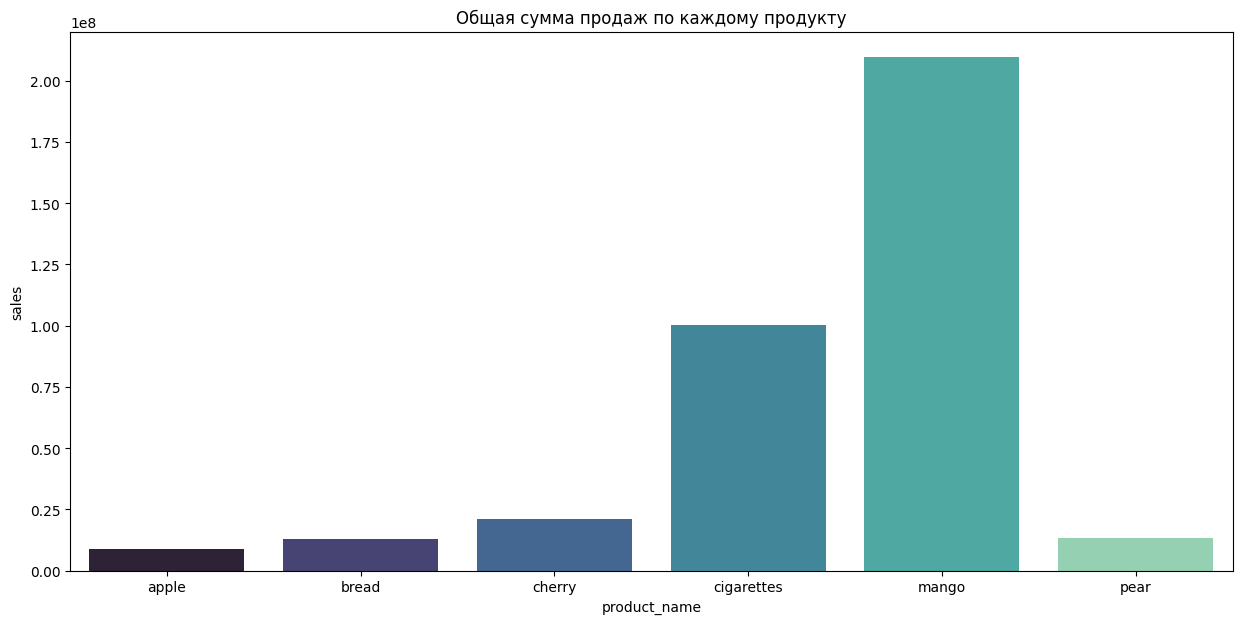

In [6]:
product_sales = am.total_sales_per_product()
plt.figure(figsize=(15, 7))
_ = sns.barplot(x='product_name', y='sales',  data=product_sales.reset_index(), palette='mako')
plt.title('Общая сумма продаж по каждому продукту')
plt.show()

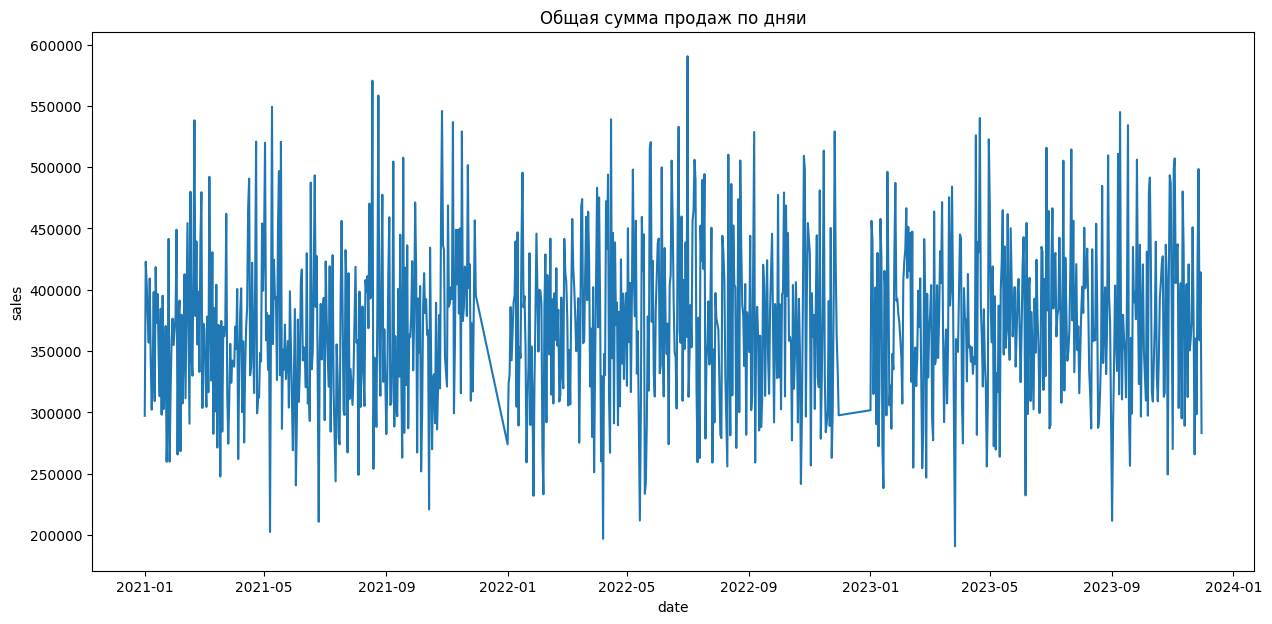

In [7]:
# общей суммы продаж по месяцам
date_sales = am.sales_over_time()
date_sales.index = pd.to_datetime(date_sales.index)
plt.figure(figsize=(15, 7))
_ = sns.lineplot(x='date', y='sales',  data=date_sales.reset_index())
plt.title('Общая сумма продаж по дняи')
plt.show()

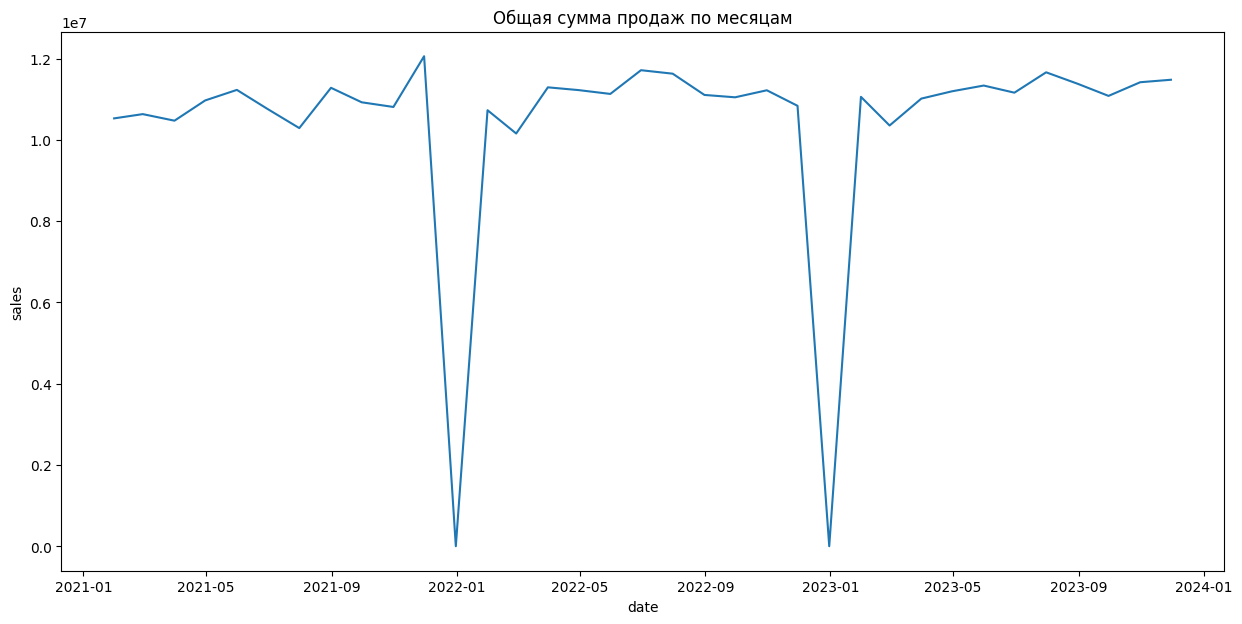

In [8]:
date_sales = am.sales_over_time()
date_sales.index = pd.to_datetime(date_sales.index)
plt.figure(figsize=(15, 7))
_ = sns.lineplot(x='date', y='sales',  data=date_sales.resample('M').sum().reset_index())
plt.title('Общая сумма продаж по месяцам')
plt.show()